In [1]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
hgt1 = np.fromfile(r"C:/Users/amitibo/Downloads/N32E034.hgt", np.dtype('>i2'))
hgt1 = hgt1.reshape(3601, 3601)

<IPython.core.display.Javascript object>


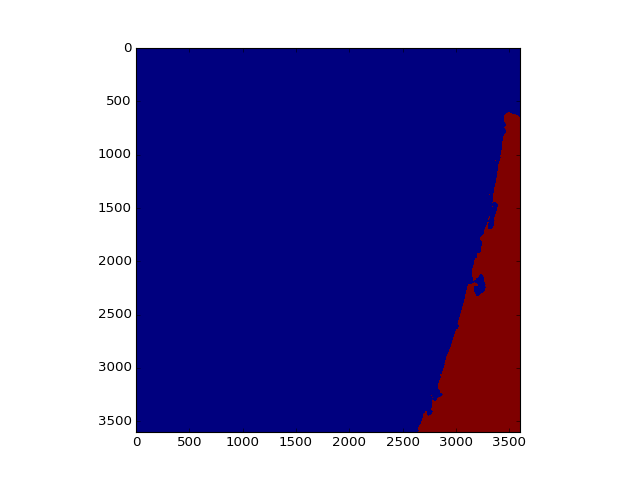

In [14]:
plt.imshow(hgt1)

<IPython.core.display.Javascript object>


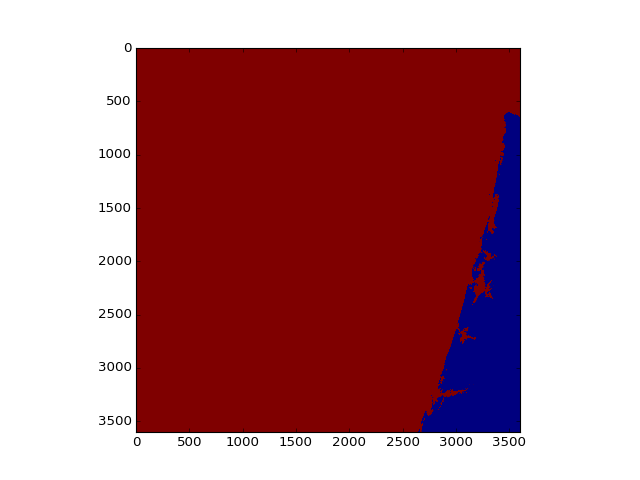

In [19]:
sea = hgt1 == 10
plt.figure()
plt.imshow(sea)

In [15]:
def calcSeaMask(img_array, grabcut_threshold, values_range=300):

    sunshader_mask = np.ones(img_array.shape, np.uint8)*cv2.GC_PR_FGD
    sunshader_mask[img_array == grabcut_threshold] = cv2.GC_PR_BGD
    img_u8 = (255 * np.clip(img_array, 0, values_range) / values_range).astype(np.uint8)
    img_u8 = np.dstack((img_u8, img_u8, img_u8))
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    rect = (0, 0, 0, 0)
    cv2.grabCut(img_u8, sunshader_mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)
    sunshader_mask = np.where(
        (sunshader_mask==cv2.GC_FGD) | (sunshader_mask==cv2.GC_PR_FGD),
        1,
        0).astype('uint8')

    return sunshader_mask


In [16]:
mask = calcSeaMask(hgt1, 10)

(3601L, 3601L) (3601L, 3601L, 3L)


<IPython.core.display.Javascript object>


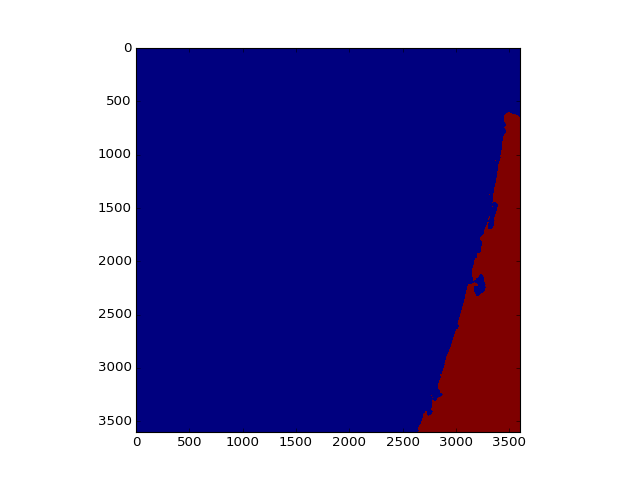

In [18]:
plt.figure()
plt.imshow(mask)

In [ ]:
plt.figure()
plt.imshow(mask)

In [13]:
import math
def deg2num(lat_deg, lon_deg, zoom):
  lat_rad = math.radians(lat_deg)
  n = 2.0 ** zoom
  xtile = int((lon_deg + 180.0) / 360.0 * n)
  ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
  return (xtile, ytile)

In [16]:
deg2num(32.775776, 35.024963, 12)

(2446, 1652)

In [17]:
from goompy import GooMPy

In [32]:
gmp = GooMPy(
    width=4096,
    height=4096,
    latitude=32.775776,
    longitude=35.024963,
    zoom=15,
    maptype='satellite',
    radius_meters=10000)

<IPython.core.display.Javascript object>


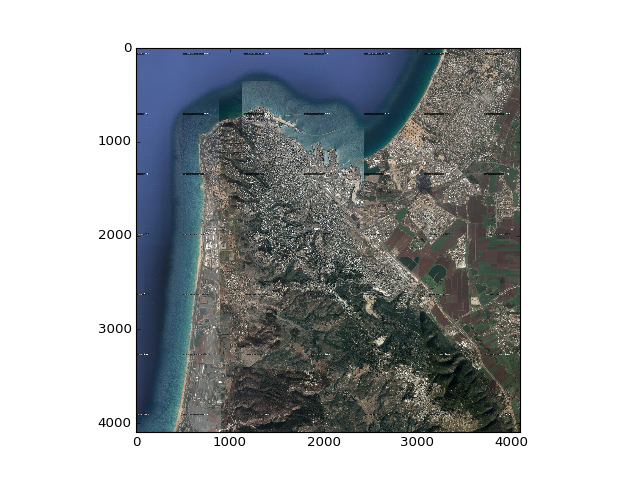

In [37]:
plt.figure()
plt.imshow(gmp.getImage())

In [36]:
gmp.move(1000, 1000)